In [17]:
"""
Course: dpat4
Lab: 04
Part: 2
"""

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from contextlib import contextmanager
from scipy.stats import pearsonr, spearmanr

TIMER: dict = {}


def record(lib: str, task: str, time_used: float) -> None:
    """
    Record the elapsed time of the task using specific lib
    :param lib: the name of the lib used (numpy, pandas)
    :param task: task number (task1)
    :param time_used: time used to complete the task
    :return: None
    """
    global TIMER
    
    if lib not in TIMER:
        TIMER[lib] = {}
    TIMER[lib][task] = time_used


@contextmanager
def timer(lib: str, task: str):
    start = time.time()
    try:
        yield
    finally:
        end = time.time()
        time_used = round(end - start, 6)
        record(lib, task, time_used)
        
        print(f'task: {task:}\nlib: {lib}\ntime used: {time_used}')


URL = "processed.cleveland.data"

print('Setup complete...')

Setup complete...


## Task No. 0
Desc: Імпортування дата сету

In [18]:
# task: 0
# lib: pandas

headers = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

with timer('pandas', 'task0'):
    pd_data = pd.read_csv(URL, sep=',', na_values='?', names=headers)
    pd_data.dropna(inplace=True)

pd_data.head()

task: task0
lib: pandas
time used: 0.006606


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [19]:
# task: 0
# lib: numpy

with timer('numpy', 'task0'):
    
    np_data = np.genfromtxt(
        URL, 
        delimiter=',',
        missing_values='?',
        filling_values=np.nan,
        dtype=None,
        encoding=None,
        names=headers
    )
    
    mask = np.all([~np.isnan(np_data[col]) for col in headers], axis=0)
    
    np_data = np_data[mask]

np_data

task: task0
lib: numpy
time used: 0.005673


array([(63., 1., 1., 145., 233., 1., 2., 150., 0., 2.3, 3., 0., 6., 0),
       (67., 1., 4., 160., 286., 0., 2., 108., 1., 1.5, 2., 3., 3., 2),
       (67., 1., 4., 120., 229., 0., 2., 129., 1., 2.6, 2., 2., 7., 1),
       (37., 1., 3., 130., 250., 0., 0., 187., 0., 3.5, 3., 0., 3., 0),
       (41., 0., 2., 130., 204., 0., 2., 172., 0., 1.4, 1., 0., 3., 0),
       (56., 1., 2., 120., 236., 0., 0., 178., 0., 0.8, 1., 0., 3., 0),
       (62., 0., 4., 140., 268., 0., 2., 160., 0., 3.6, 3., 2., 3., 3),
       (57., 0., 4., 120., 354., 0., 0., 163., 1., 0.6, 1., 0., 3., 0),
       (63., 1., 4., 130., 254., 0., 2., 147., 0., 1.4, 2., 1., 7., 2),
       (53., 1., 4., 140., 203., 1., 2., 155., 1., 3.1, 3., 0., 7., 1),
       (57., 1., 4., 140., 192., 0., 0., 148., 0., 0.4, 2., 0., 6., 0),
       (56., 0., 2., 140., 294., 0., 2., 153., 0., 1.3, 2., 0., 3., 0),
       (56., 1., 3., 130., 256., 1., 2., 142., 1., 0.6, 2., 1., 6., 2),
       (44., 1., 2., 120., 263., 0., 0., 173., 0., 0. , 1., 0., 

In [20]:
# test for NaN values

nan_mask = np.any([np.isnan(np_data[col]) for col in headers], axis=0)
nan = np_data[nan_mask]

nan

array([],
      dtype=[('age', '<f8'), ('sex', '<f8'), ('cp', '<f8'), ('trestbps', '<f8'), ('chol', '<f8'), ('fbs', '<f8'), ('restecg', '<f8'), ('thalach', '<f8'), ('exang', '<f8'), ('oldpeak', '<f8'), ('slope', '<f8'), ('ca', '<f8'), ('thal', '<f8'), ('num', '<i8')])

## Task No. 1
Нормалізувати датасет

In [21]:
# normalisation - scaling - min-max normalisation 
def normalise(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# task: 1
# lib: pandas

with timer('pandas', 'task1'):
    
    pd_data = pd_data.astype(float)
    
    normalise_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
    
    pd_normalised = pd_data.copy()
    pd_normalised[normalise_cols] = normalise(pd_data[normalise_cols])
    
pd_normalised

task: task1
lib: pandas
time used: 0.005524


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,0.481132,0.244292,1.0,2.0,0.603053,0.0,0.370968,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.241935,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.419355,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.225806,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,2.0,1.0,7.0,3.0


In [33]:
# task: 1
# lib: numpy

with timer('numpy', 'task1'):
    
    np_normalised = np_data.copy()
    
    for col in normalise_cols:
        np_normalised[col] = normalise(np_data[col])
    
np_normalised

task: task1
lib: numpy
time used: 0.001404


array([(63., 1., 1., 0.48113208, 0.24429224, 1., 2., 0.60305344, 0., 0.37096774, 3., 0., 6., 0),
       (67., 1., 4., 0.62264151, 0.3652968 , 0., 2., 0.28244275, 1., 0.24193548, 2., 3., 3., 2),
       (67., 1., 4., 0.24528302, 0.23515982, 0., 2., 0.44274809, 1., 0.41935484, 2., 2., 7., 1),
       (37., 1., 3., 0.33962264, 0.28310502, 0., 0., 0.88549618, 0., 0.56451613, 3., 0., 3., 0),
       (41., 0., 2., 0.33962264, 0.17808219, 0., 2., 0.77099237, 0., 0.22580645, 1., 0., 3., 0),
       (56., 1., 2., 0.24528302, 0.25114155, 0., 0., 0.81679389, 0., 0.12903226, 1., 0., 3., 0),
       (62., 0., 4., 0.43396226, 0.32420091, 0., 2., 0.67938931, 0., 0.58064516, 3., 2., 3., 3),
       (57., 0., 4., 0.24528302, 0.52054795, 0., 0., 0.70229008, 1., 0.09677419, 1., 0., 3., 0),
       (63., 1., 4., 0.33962264, 0.29223744, 0., 2., 0.58015267, 0., 0.22580645, 2., 1., 7., 2),
       (53., 1., 4., 0.43396226, 0.17579909, 1., 2., 0.64122137, 1., 0.5       , 3., 0., 7., 1),
       (57., 1., 4., 0.4339622

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

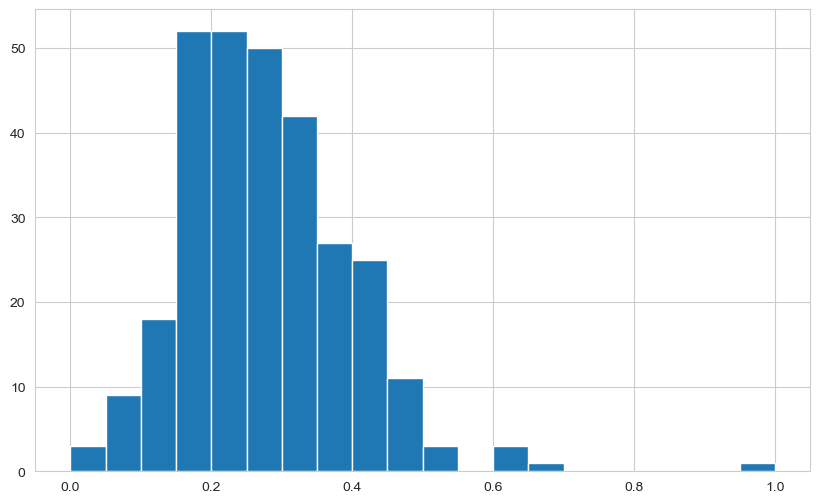

In [43]:

plt.figure(figsize=(10, 6))
plt.hist(np_normalised['chol'], bins=20, kde=True, edgecolor='black')
plt.title('Histogram of Normalized Cholesterol Levels')
plt.xlabel('Normalized Cholesterol Levels')
plt.ylabel('Count')
plt.show()

## Task No. 2
Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

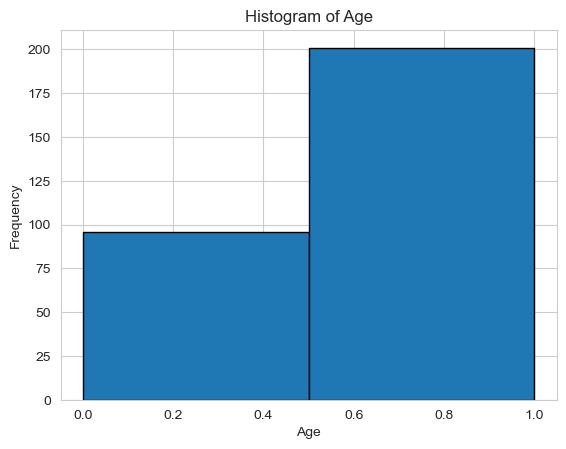

task: task2
lib: pandas
time used: 0.150548


In [41]:
# task: 2
# lib: pandas

with timer('pandas', 'task2'):
    plt.hist(np_normalised['sex'], bins=2, edgecolor='black')
    
    plt.title('Histogram of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

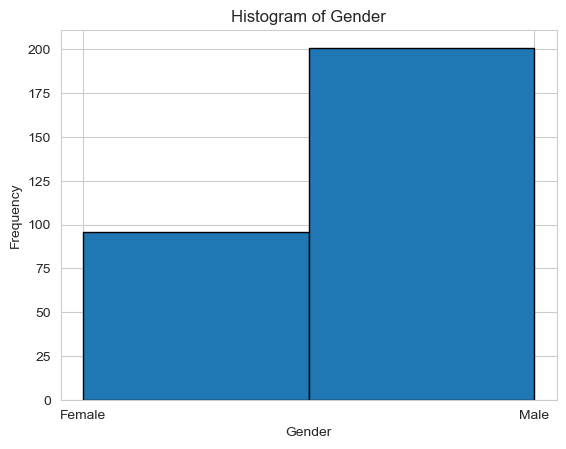

task: task2
lib: numpy
time used: 0.122653


In [38]:
# task: 2
# lib: numpy

with timer('numpy', 'task2'):
    plt.hist(np_normalised['sex'], bins=2, edgecolor='black')
    
    plt.xticks([0,1], ['Female','Male'])
    plt.title('Histogram of Gender')
    plt.xlabel('Gender')
    plt.ylabel('Frequency')
    plt.show()

## Task No. 3
Збудувати графік залежності одного integer/real атрибута від іншого.

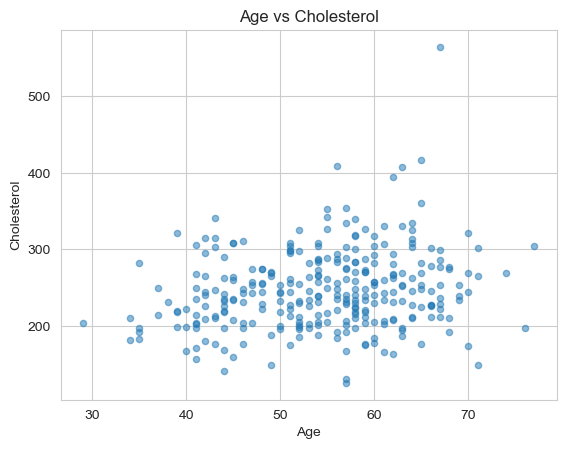

task: task3
lib: pandas
time used: 0.176003


In [25]:
# task: 3
# lib: pandas

with timer('pandas', 'task3'):
    pd_data.plot(kind='scatter', x='age', y='chol', alpha=0.5)
    
    plt.title('Age vs Cholesterol')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.show()

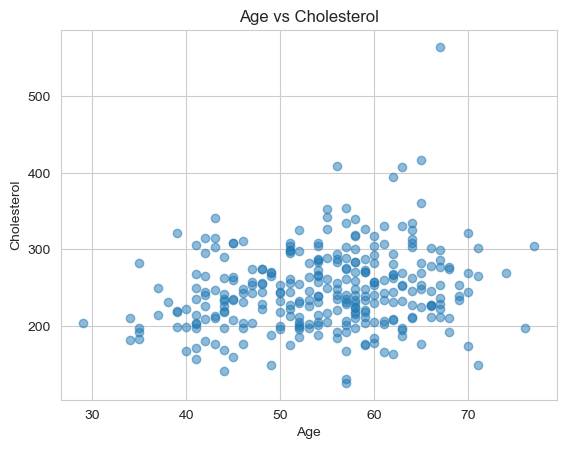

task: task3
lib: numpy
time used: 0.184862


In [26]:
# task: 3
# lib: numpy

with timer('numpy', 'task3'):
    plt.scatter(data=np_data, x='age', y='chol', alpha=0.5)
    
    plt.title('Age vs Cholesterol')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.show()

## Task No. 4
Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [27]:
# task: 4
# lib: pandas

def get_correlation(dataframe, cols: tuple) -> pd.DataFrame:
    
    col1, col2 = cols
    
    pearson, _ = pearsonr(dataframe[col1], dataframe[col2])
    spearman, _ = spearmanr(dataframe[col1], dataframe[col2])
    
    res = {
        f'{col1} / {col2}': {
            'pearson': pearson,
            'spearman': spearman
        }
    }
    
    return pd.DataFrame(res)
    
    
with timer('pandas', 'task4'):
    
    pd_correlation = get_correlation(pd_data, ('age', 'chol'))

pd_correlation

task: task4
lib: pandas
time used: 0.017764


,age / chol
pearson,0.202644
spearman,0.183440


In [28]:
# task: 4
# lib: numpy

with timer('numpy', 'task4'):
    
    np_correlation = get_correlation(np_data, ('fbs', 'restecg'))

np_correlation

task: task4
lib: numpy
time used: 0.004828


,fbs / restecg
pearson,0.068831
spearman,0.068813


## Task No. 5
Провести One Hot Encoding категоріального string атрибуту.

In [29]:
# task: 5
# lib: pandas

with timer('pandas', 'task5'):
    
    pd_oc = pd.get_dummies(pd_data['sex'], prefix='sex')

pd_oc

task: task5
lib: pandas
time used: 0.003519


,sex_0.0,sex_1.0
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
297,True,False
298,False,True
299,False,True
300,False,True


In [30]:
# task: 5
# lib: numpy

with timer('numpy', 'task5'):
    
   cp = np_data['sex'].astype(int)
   np_oc = np.eye(np.max(cp) + 1)[cp]

np_oc

task: task5
lib: numpy
time used: 5.6e-05


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

## Task No. 6
Провести візуалізацію багатовимірних даних

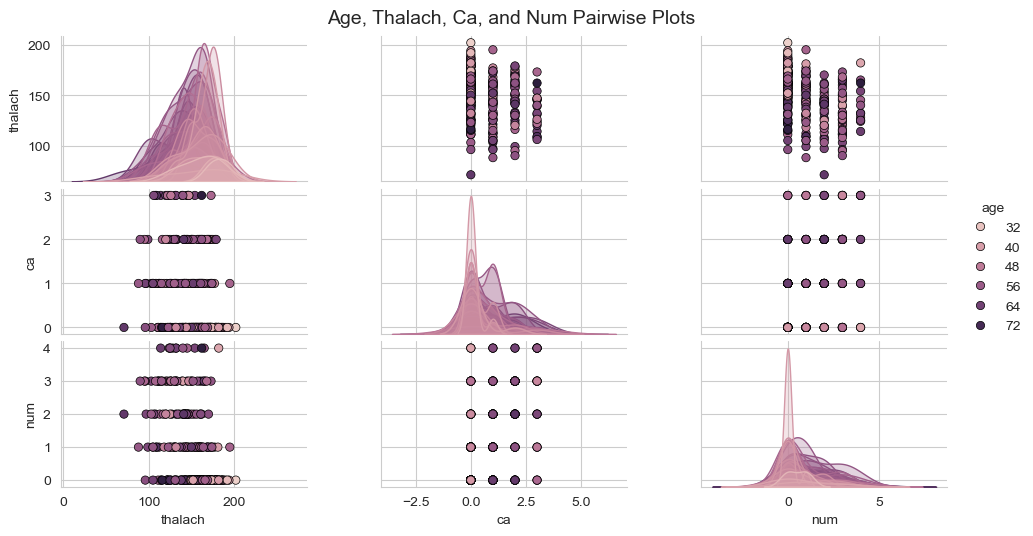

In [31]:
cols = ['age', 'thalach', 'ca', 'num']
pp = sns.pairplot(pd_data[cols], hue='age', height=1.8, aspect=1.8,
              plot_kws=dict(edgecolor="black", linewidth=0.5))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Age, Thalach, Ca, and Num Pairwise Plots', fontsize=14)


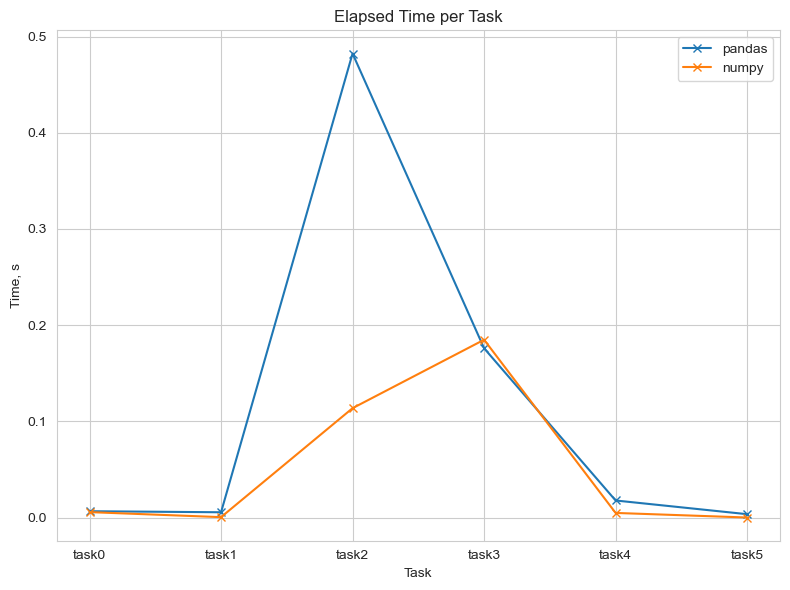

In [32]:
plt.figure(figsize=(8,6))
for lib_name, tasks in TIMER.items():
    plt.plot(tasks.keys(), tasks.values(), marker='x', label=lib_name)

plt.ylabel('Time, s')
plt.title(f"Elapsed Time per Task")
plt.xlabel("Task")
plt.legend()
plt.grid(True)
plt.tight_layout()